# install
- github:https://github.com/microsoft/LightGBM
- document:https://lightgbm.readthedocs.io/en/latest/
- Qiita:https://qiita.com/mitama/items/40d695c2485c61303d5a

# sample code
- https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
- https://lightgbm.readthedocs.io/en/latest/Python-API.html#data-structure-api

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib as mlp

## Prepare the data

In [2]:
train = pd.read_csv("./input/fish.csv", sep=",", encoding="utf-8")
train.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
le = preprocessing.LabelEncoder()
train.Species = le.fit_transform(train.Species)
train.rand = train.Height.astype('float') 

In [4]:
y = train.Weight.values
train.drop(['Weight'], inplace=True, axis=1)
x = train.values

## Create training and validation sets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

## Create the LightGBM data containers

In [6]:
categorical_features = [c for c, col in enumerate(train.columns) if 'Species' in col]
train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(x_test, label=y_test)

## Train the model

In [7]:
parameters = {
    'application': 'binary',
    'objective': 'regression',
    'metric': 'rmse',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}
evaluation_results  = {}
model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       evals_result = evaluation_results,
                       num_boost_round=5000,
                       early_stopping_rounds=100)
model.save_model('model.txt', num_iteration=model.best_iteration)

105.443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[311]	valid_0's rmse: 105.525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[312]	valid_0's rmse: 105.534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[313]	valid_0's rmse: 105.651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[314]	valid_0's rmse: 105.734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[315]	valid_0's rmse: 105.89
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[316]	valid_0's rmse: 105.929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[317]	valid_0's rmse: 106.075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[318]	valid_0's rmse: 106.093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[319]	valid_0's rmse: 106.231
[LightGBM] [Warning] No further splits with posi

## pred

<AxesSubplot:>

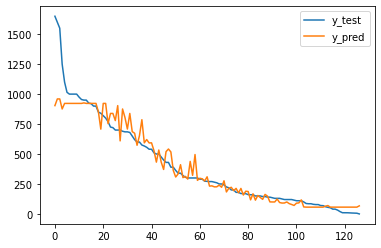

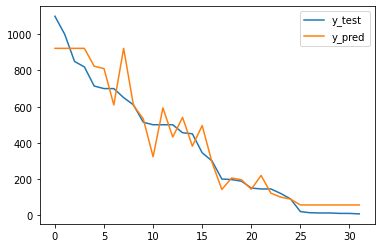

In [8]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

pred_train_df = pd.DataFrame({"y_test": y_train, "y_pred":y_train_pred}).sort_values('y_test', ascending=False).reset_index(drop=True)
pred_train_df.plot()

pred_test_df = pd.DataFrame({"y_test": y_test, "y_pred":y_test_pred}).sort_values('y_test', ascending=False).reset_index(drop=True)
pred_test_df.plot()

## Metrics

In [9]:
metrics_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
metrics_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("train rmse: "+str(metrics_train))
print("test  rmse: "+str(metrics_test))

train rmse: 124.54234764504042
test  rmse: 90.75165818276304


## plot

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

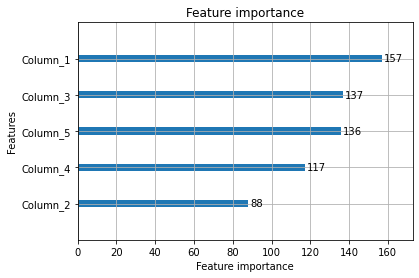

In [10]:
lgb.plot_importance(model)

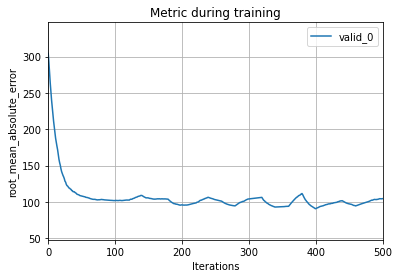

In [11]:
ax = lgb.plot_metric(evaluation_results, metric='rmse', ylabel='root_mean_absolute_error')

In [12]:
lgb.plot_tree(model)

Format: "png" not recognized. Use one of:


CalledProcessError: Command '['dot', '-Tpng']' returned non-zero exit status 1. [stderr: b'Format: "png" not recognized. Use one of:\r\n']

In [13]:
# 決定木を可視化
# https://nehori.com/nikki/2020/02/16/post-15886/
def display_tree(clf):
    ax = lgb.plot_tree(clf, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
    plt.show()
    print('Plotting tree with graphviz...')
    graph = lgb.create_tree_digraph(clf, tree_index=0, format='png', name='Tree')
    graph.render(view=True)
display_tree(model)

Format: "png" not recognized. Use one of:


CalledProcessError: Command '['dot', '-Tpng']' returned non-zero exit status 1. [stderr: b'Format: "png" not recognized. Use one of:\r\n']